<a href="https://colab.research.google.com/github/FaiazS/Handwritten-Digit-Classification-using-CNNs-MNIST-Dataset-/blob/main/Handwritten_Digit_Classification_using_CNNs_(MNIST_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Load Libraries

import tensorflow as tf
from tensorflow.keras import models, layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Dataset

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
#Normalize pixel values to range [0,1]

x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
#Resizing / Reshaping to match CNN inputs(batchsize, height, width, channels)

x_train = x_train.reshape(-1, 28, 28, 1)

x_test = x_test.reshape(-1, 28, 28, 1)

print("Training shape ", x_train.shape)

print("Testing shape ", x_test.shape)

Training shape  (60000, 28, 28, 1)
Testing shape  (10000, 28, 28, 1)


In [7]:
#Building, Compiling and Training the CNN Model with Batch Normalization and Dropout Layers.

def build_batch_normalization_and_dropout_CNN():

  cnn = tf.keras.models.Sequential([

                                    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', strides = 2, input_shape = (28, 28, 1)),

                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', strides = 2),

                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(128, activation = 'relu'),

                                    tf.keras.layers.BatchNormalization(),

                                    tf.keras.layers.Dropout(0.5), #Deactivating randomly 50% of the neurons to avoid Overfitting, and promoting Generalization for the Model to learn more Effectively.

                                    tf.keras.layers.Dense(10, activation ='softmax')

  ])

  cnn.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return cnn

cnn_model = build_batch_normalization_and_dropout_CNN()

cnn_model_with_batch_norm_and_dropout_training_stats = cnn_model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 5, batch_size= 64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - accuracy: 0.8669 - loss: 0.4448 - val_accuracy: 0.9816 - val_loss: 0.0571
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9736 - loss: 0.0873 - val_accuracy: 0.9844 - val_loss: 0.0469
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9802 - loss: 0.0626 - val_accuracy: 0.9836 - val_loss: 0.0491
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9843 - loss: 0.0512 - val_accuracy: 0.9867 - val_loss: 0.0391
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9873 - loss: 0.0405 - val_accuracy: 0.9889 - val_loss: 0.0371


Without Dropout and Batch Normalization.


In [8]:
def build_simple_CNN():

  simple_cnn = tf.keras.models.Sequential([

                                           tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', strides = 2, input_shape =(28,28,1)),

                                           tf.keras.layers.Conv2D(32,(3, 3), activation ='relu', strides = 2),

                                           tf.keras.layers.Flatten(),

                                           tf.keras.layers.Dense(128, activation = 'relu'),

                                           tf.keras.layers.Dense(10, activation = 'softmax')

  ])

  simple_cnn.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

  return simple_cnn

simple_cnn_model = build_simple_CNN()

simple_cnn_model_training_stats = simple_cnn_model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8675 - loss: 0.4660 - val_accuracy: 0.9741 - val_loss: 0.0786
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9785 - loss: 0.0685 - val_accuracy: 0.9824 - val_loss: 0.0541
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9863 - loss: 0.0421 - val_accuracy: 0.9851 - val_loss: 0.0453
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9907 - loss: 0.0305 - val_accuracy: 0.9877 - val_loss: 0.0393
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9918 - loss: 0.0239 - val_accuracy: 0.9887 - val_loss: 0.0393


Just With Dropout

In [9]:
def build_dropout_cnn():

  dropout_cnn = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3,3), activation = 'relu', strides = 2, input_shape = (28,28,1)),

                                             tf.keras.layers.Conv2D(32, (3 ,3), activation = 'relu', strides = 2),

                                             tf.keras.layers.Flatten(),

                                             tf.keras.layers.Dense(128, activation = 'relu'),

                                             tf.keras.layers.Dropout(0.5),

                                             tf.keras.layers.Dense(10, activation = 'softmax')

                                            ])

  dropout_cnn.compile(optimizer ='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return dropout_cnn

dropout_cnn_model = build_dropout_cnn()

dropout_cnn_model_training_stats = dropout_cnn_model.fit(x_train, y_train, validation_data =(x_test, y_test), epochs = 5, batch_size = 64)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8220 - loss: 0.5925 - val_accuracy: 0.9752 - val_loss: 0.0768
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9632 - loss: 0.1230 - val_accuracy: 0.9830 - val_loss: 0.0536
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9724 - loss: 0.0875 - val_accuracy: 0.9844 - val_loss: 0.0486
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9786 - loss: 0.0709 - val_accuracy: 0.9863 - val_loss: 0.0435
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.9820 - loss: 0.0603 - val_accuracy: 0.9865 - val_loss: 0.0426


Just with Batch Normalization


In [10]:
def build_batch_normalization_cnn():

  batch_norm_cnn = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', strides = 2, input_shape =(28, 28, 1)),

                                                tf.keras.layers.BatchNormalization(),

                                                tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', strides = 2),

                                                tf.keras.layers.BatchNormalization(),

                                                tf.keras.layers.Flatten(),

                                                tf.keras.layers.Dense(128, activation = 'relu'),

                                                tf.keras.layers.BatchNormalization(),

                                                tf.keras.layers.Dense(10, activation = 'softmax')

                                               ])

  batch_norm_cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

  return batch_norm_cnn

batch_norm_cnn_model = build_batch_normalization_cnn()

batch_normalization_cnn_model_training_stats = batch_norm_cnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 5, batch_size = 64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.9094 - loss: 0.2952 - val_accuracy: 0.9816 - val_loss: 0.0547
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 23ms/step - accuracy: 0.9863 - loss: 0.0462 - val_accuracy: 0.9835 - val_loss: 0.0499
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 23ms/step - accuracy: 0.9910 - loss: 0.0306 - val_accuracy: 0.9870 - val_loss: 0.0392
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9930 - loss: 0.0222 - val_accuracy: 0.9850 - val_loss: 0.0462
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 24ms/step - accuracy: 0.9952 - loss: 0.0164 - val_accuracy: 0.9869 - val_loss: 0.0419


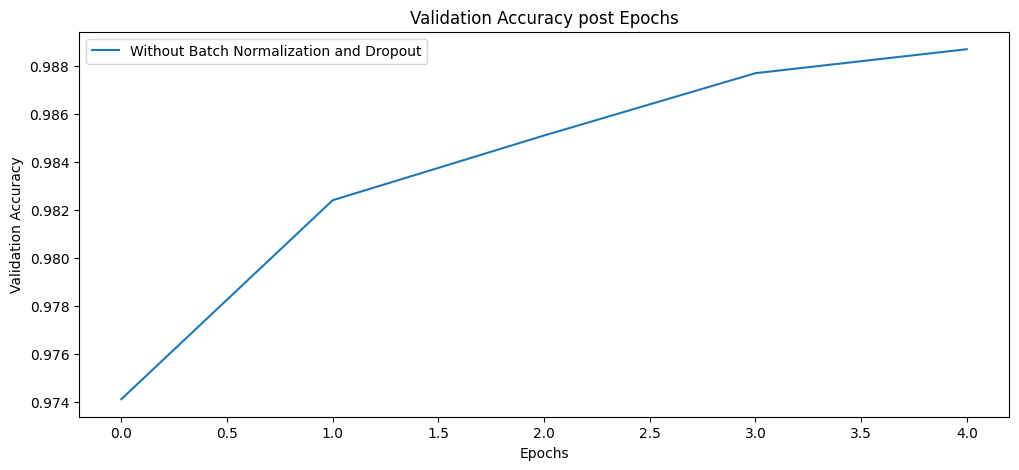

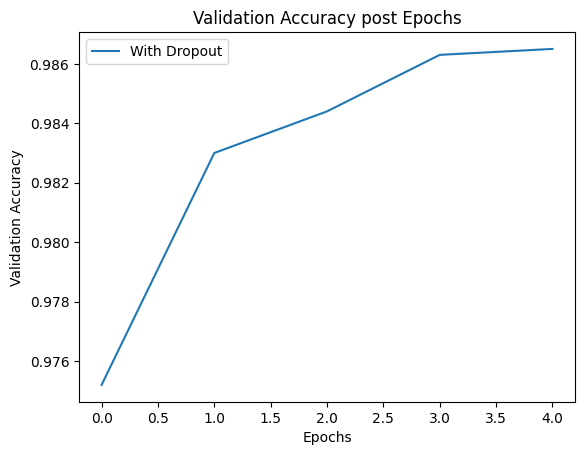

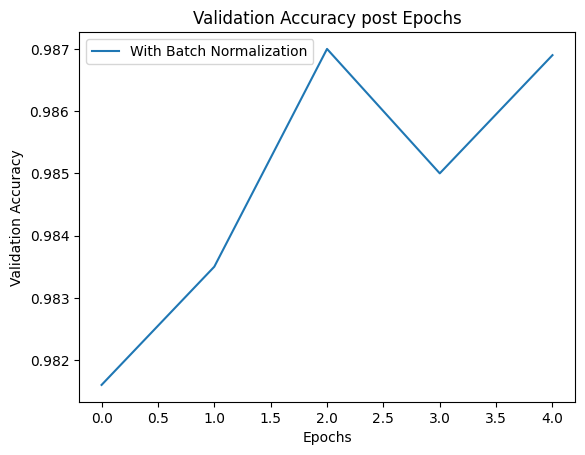

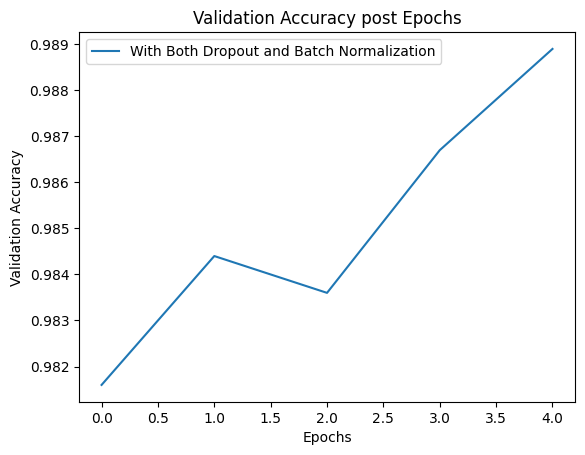

In [11]:
#Visualizing the Comparing the Performance of each CNN model

def plot_training_stats(training_stats, labels):

 plt.figure(figsize =(12,5))

 for i, stats in enumerate(training_stats):

  plt.plot(stats.history['val_accuracy'], label = labels[i])

  plt.title("Validation Accuracy post Epochs")

  plt.xlabel("Epochs")

  plt.ylabel("Validation Accuracy")

  plt.legend()

  plt.show()


plot_training_stats([simple_cnn_model_training_stats, dropout_cnn_model_training_stats, batch_normalization_cnn_model_training_stats,cnn_model_with_batch_norm_and_dropout_training_stats],["Without Batch Normalization and Dropout","With Dropout","With Batch Normalization", "With Both Dropout and Batch Normalization"])